In [2]:
from abc import ABC, abstractmethod

class Quantum_reg(ABC):
    
    @abstractmethod
    def __init__(self, n_qubits):
        pass
    
    @abstractmethod
    def set_qubits(self, state_vector):
        pass
    
    @abstractmethod
    def apply_gate(self, gate, qubits):
        pass
    
    @abstractmethod
    def measure(self, qubits):
        pass
    
    @abstractmethod
    def reset(self):
        pass

In [ ]:
#External Packages
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import copy 
from numpy.random import randint
from fractions import Fraction
# qbit Class
# it creates a qbit in the |0> state. 
# Properties
# state: gives an array with the amplitude of the state |1> and |0> respectively 

class qbit:
    def __init__(self,state:list[complex]=[1,0]):
        self.state = np.array(state,dtype=complex)
        
# Quantum Register Class
# it creates a quantum register of n (length) qbits  all in the state |0>. 
# Properties
# length= number of qbit in the quantum register (type:int)
# tensor= state vector of que the quantum register (type:array)

class quantum_reg:    
    def __init__(self,length:int):
        self.length=length
        qb_array=[]
        for i in range (length):
            qb_array.append(qbit())
        self.qb_array=np.array(qb_array)
        self.tensor_prod_priv()
    
    #tensor_prod_priv : method that creates the initial state vector of the system by doing tensor product
    #of the individual qbits.     
    def tensor_prod_priv(self): 
        self.tensor=self.qb_array[0].state;
        for qb in self.qb_array[1:]:
            temp=[]
            for i in range(np.size(qb.state)):
                for j in range(np.size(self.tensor)):
                    temp.append(self.tensor[j]*qb.state[i])
            self.tensor=np.array(temp) / np.linalg.norm(np.array(temp))
            
            
#--------------------------- 1 QBit Gates ---------------------------------------#          
    
    def h(self,pos:int):
        """ Hadamard Gate method which creates the matrix of the gate whichc acts on the state n (pos) of the quantum register
        his method applies the Hadamard gate to the state vector of the quantum register.
        Parameters:
                pos:  position of the qbit to which the h gate is applied (type:int)

        #return: an array with the matrix corresponding to the Hadamard gate.
        
        """
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=(-1)**bin_i[-1-pos]
            pos2=bin_i;
            pos2[-pos-1]=1-bin_i[-1-pos]
            pos2=int(''.join(np.array(pos2,dtype=str).tolist()), 2)               
            matrix[pos2,i]=1

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix

       
    def p(self,pos:int,theta:float,conj:int=0):
        """ Phase Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register

        This method applies the phase gate to the state vector of the quantum register.
        Parameters:
                pos:  position of the qbit to which the h gate is applied (type:int)
                theta: phase of the gate (type:float)
                conj: 0 if the gate is not conjugated, 1 if it is (type:int)
        Returns:
                an array with the matrix corresponding to the phase gate.
        """
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            if bin_i[-1-pos]==0:
                pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
                matrix[pos1,i]=1
            else: 
                pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
                matrix[pos1,i]=np.exp(1j*theta*((-1)**conj))

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    

    def t(self,pos:int,conj:int=0):
        """ T Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the T gate to the state vector of the quantum register.
        Parameters:
                pos:  position of the qbit to which the h gate is applied (type:int)
                conj: 0 if the gate is not conjugated, 1 if it is (type:int)        
        Returns:
                an array with the matrix corresponding to the T gate.
        """
        return self.p(pos,np.pi*0.25,conj)
    

    def s(self,pos:int,conj:int=0):
        """ S Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the S gate to the state vector of the quantum register.

        Parameters:
                pos:  position of the qbit to which the h gate is applied (type:int)
                conj: 0 if the gate is not conjugated, 1 if it is (type:int)    
        Returns:   
                an array with the matrix corresponding to the S gate.
        """
        return self.p(pos,np.pi*0.5,conj)
    

    def Rz(self,pos:int,theta:float,conj:int=0):
        """ Rz Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Rz gate to the state vector of the quantum register.

        Parameters: 
                pos:  position of the qbit to which the h gate is applied (type:int)
                theta: phase of the gate (type:float)
                conj: 0 if the gate is not conjugated, 1 if it is (type:int)
        Returns:
                an array with the matrix corresponding to the Rz gate.
        """
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base; 
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=np.exp((-1)**(1-bin_i[-1-pos])*1j*((-1)**(conj))*theta/(2))

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    

    def Ry(self,pos:int,theta:float=0):
        """ Ry Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Ry gate to the state vector of the quantum register.

        Parameters: 
                pos:  position of the qbit to which the h gate is applied (type:int)
                theta: phase of the gate (type:float)
        Returns:
                an array with the matrix corresponding to the Ry gate.
        """
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=np.cos(theta/2)
            pos2=bin_i;
            pos2[-pos-1]=1-bin_i[-1-pos]
            pos2=int(''.join(np.array(pos2,dtype=str).tolist()), 2)               
            matrix[pos2,i]=(-1)**bin_i[-1-pos]*np.sin(theta/2)
            
        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    

    #///////////////////// Pauli Gates //////////////////////#
        
    
    def z(self,pos:int):
        """ Pauli Z Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Pauli Z gate to the state vector of the quantum register.

        Parameters: 
                pos:  position of the qbit to which the h gate is applied (type:int)
        Returns:
                an array with the matrix corresponding to the Pauli Z gate.
        """
        return self.p(pos,np.pi)
    
    
    def x(self, pos:int):
        """ Pauli X Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Pauli X gate to the state vector of the quantum register.

        Parameters: 
                pos:  position of the qbit to which the h gate is applied (type:int)
        Returns:
                an array with the matrix corresponding to the Pauli X gate.
        """
        matrix=self.h(pos)
        matrix=matrix.dot(self.z(pos))
        matrix=matrix.dot(self.h(pos))

        return matrix
    

    def y(self, pos:int):
        """ Pauli Y Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Pauli Y gate to the state vector of the quantum register.

        Parameters: 
                pos:  position of the qbit to which the h gate is applied (type:int)
        Returns:
                an array with the matrix corresponding to the Pauli Y gate.
        """
        matrix=self.s(pos)
        matrix=matrix.dot(self.x(pos))
        matrix=matrix.dot(self.s(pos,1))
        return matrix
    
#--------------------------- 2 QBit Gates ---------------------------------------#   

    def cx(self,control:int,target:int):
        """ CNOT Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register

        This method applies the CNOT gate to the state vector of the quantum register.

        Parameters:
                control: position of the control qbit (type:int)
                target: position of the target qbit (type:int)
        Returns:
                an array with the matrix corresponding to the CNOT gate.
        """
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            bin_i[-1-target]=1*bin_i[-1-control]+((-1)**bin_i[-1-control])*bin_i[-1-target]
            pos3=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)               
            matrix[pos3,i]=1

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix    
    

    def cp(self,control:int,target:int,theta:int,conj:int=0):
        """ Controlled Phase Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Controlled Phase gate to the state vector of the quantum register.

        Parameters:
                control: position of the control qbit (type:int)
                target: position of the target qbit (type:int)
                theta: phase of the gate (type:float)
                conj: 0 if the gate is not conjugated, 1 if it is (type:int)
        Returns:
                an array with the matrix corresponding to the Controlled Phase gate.
        """
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos3=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)  
            matrix[pos3,i]=np.exp(((-1)**conj)*bin_i[-1-target]*bin_i[-1-control]*1j*theta)

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix 
    

    def ck(self,control:int,target:int,k:int=1,conj:int=0):
        """ Controlled k Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        Parameters:
                control: position of the control qbit (type:int)
                target: position of the target qbit (type:int)
                k: number of times the gate is applied (type:int)
                conj: 0 if the gate is not conjugated, 1 if it is (type:int)
        Returns:
                an array with the matrix corresponding to the Controlled k gate.
        """
        matrix=self.cp(control,target,2*np.pi/(2**k))
        return matrix 


    def cz(self, control:int, target:int):
        """ Controlled Z Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register

        This method applies the Controlled Z gate to the state vector of the quantum register.

        Parameters:
                control: position of the control qbit (type:int)
                target: position of the target qbit (type:int)
        Returns:
                an array with the matrix corresponding to the Controlled Z gate.
        """
        matrix=self.h(target)
        matrix=matrix.dot(self.cx(control,target))
        matrix=matrix.dot(self.h(target))
        return matrix
    

    def swap(self, qb1:int, qb2:int):
        """ Swap Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        This method applies the Swap gate to the state vector of the quantum register.

        Parameters:
                qb1: position of the first qbit (type:int)
                qb2: position of the second qbit (type:int)
        Returns:
                an array with the matrix corresponding to the Swap gate.
        """
        matrix=self.cx(qb1,qb2);
        matrix=matrix.dot(self.cx(qb2,qb1))
        matrix=matrix.dot(self.cx(qb1,qb2))
        return matrix
    
    
#---------------------- Other Gates ------------------------#

    #///////////////////// Quantum Fourier Transform //////////////////////#

    def cft(self,n: int):
        """ Quantum Fourier Transform method which creates the matrix of the gate which acts on the state n (pos) of the quantum register

        This method applies the Quantum Fourier Transform gate to the state vector of the quantum register.

        Parameters:
                n: number of qbits to which the gate is applied (type:int)
        Returns:
                an array with the matrix corresponding to the Quantum Fourier Transform gate.
        """
        matrix=np.diag(np.ones(2**self.length,dtype=complex))
        for i in range(n):
            matrix=matrix.dot(self.h(n-1-i))
            for j in range(n-1-i):
                matrix=matrix.dot(self.ck(j,n-1-i,n-i-j))
        for qb in range(n//2):
             matrix=matrix.dot(self.swap(qb, n-qb-1))
        return matrix
    
    def icft(self,n: int):
        """ Inverse Quantum Fourier Transform method which creates the matrix of the gate which acts on the state n (pos) of the quantum register

        This method applies the Inverse Quantum Fourier Transform gate to the state vector of the quantum register.

        Parameters:
                n: number of qbits to which the gate is applied (type:int)
        Returns:
                an array with the matrix corresponding to the Inverse Quantum Fourier Transform gate.
        """
        matrix=np.diag(np.ones(2**self.length,dtype=complex))
        for qb in range(n//2):
             matrix=matrix.dot(self.swap(qb, n-qb-1))
        for i in range(n):
            for j in range(i):
                matrix=matrix.dot(self.ck(j,i,i-j+1,1))
            matrix=matrix.dot(self.h(i))
        return matrix
    

    def toffoli(self,c1:int,c2:int,t:int):
        """ Toffoli Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        Parameters:
                c1: position of the first control qbit (type:int)
                c2: position of the second control qbit (type:int)
                t: position of the target qbit (type:int)

        Returns:    
                an array with the matrix corresponding to the Toffoli gate.
        """
        matrix=np.diag(np.ones(2**self.length))
        matrix=matrix.dot(self.h(t))
        matrix=matrix.dot(self.cx(c2,t))
        matrix=matrix.dot(self.t(t,1))
        matrix=matrix.dot(self.cx(c1,t))
        matrix=matrix.dot(self.t(t))
        matrix=matrix.dot(self.cx(c2,t))
        matrix=matrix.dot(self.t(t,1))
        matrix=matrix.dot(self.cx(c1,t))
        matrix=matrix.dot(self.t(t))
        matrix=matrix.dot(self.t(c2))
        matrix=matrix.dot(self.cx(c1,c2))
        matrix=matrix.dot(self.h(t))
        matrix=matrix.dot(self.t(c2,1))
        matrix=matrix.dot(self.t(c1))
        matrix=matrix.dot(self.cx(c1,c2))
        return matrix


    def ccz(self, reg, control1:int,control2:int, target:int):
        """ CCZ Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        Parameters:
                reg: quantum register (type:quantum_reg)
                control1: position of the first control qbit (type:int)
                control2: position of the second control qbit (type:int)
                target: position of the target qbit (type:int)
        
        Returns:   
                an array with the matrix corresponding to the CCZ gate.
        """
        matrix=reg.cx(control1,target)
        matrix=matrix.dot(reg.t(target,1))
        matrix=matrix.dot(reg.cx(control2,target))
        matrix=matrix.dot(reg.t(target))
        matrix=matrix.dot(reg.cx(control1,target))
        matrix=matrix.dot(reg.t(target,1))
        matrix=matrix.dot(reg.cx(control2,target))
        matrix=matrix.dot(reg.t(target))
        matrix=matrix.dot(reg.t(control1))
        matrix=matrix.dot(reg.cx(control2,control1))
        matrix=matrix.dot(reg.t(control1,1))
        matrix=matrix.dot(reg.cx(control2,control1))
        matrix=matrix.dot(reg.t(control2))
        return matrix


    def cccz(self, reg, control1:int,control2:int,control3:int, target:int):
        """ CCCZ Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        Parameters:
                reg: quantum register (type:quantum_reg)
                control1: position of the first control qbit (type:int)
                control2: position of the second control qbit (type:int)
                control3: position of the third control qbit (type:int)
                target: position of the target qbit (type:int)
        Returns:
                an array with the matrix corresponding to the CCCZ gate.
        """
        theta=np.pi/8
        #--------------------------#
        matrix=reg.p(control1,theta)

        #--------------------------------#
        matrix=matrix.dot(reg.cx(control1,control2))
        matrix=matrix.dot(reg.p(control2,theta,1))
        matrix=matrix.dot(reg.cx(control1,control2))
        matrix=matrix.dot(reg.p(control2,theta))
        #--------------------------------#
        matrix=matrix.dot(reg.cx(control2,control3))
        matrix=matrix.dot(reg.p(control3,theta,1))
        matrix=matrix.dot(reg.cx(control1,control3))
        matrix=matrix.dot(reg.p(control2,theta,0))
        matrix=matrix.dot(reg.cx(control2,control3))
        matrix=matrix.dot(reg.p(control3,theta,1))
        matrix=matrix.dot(reg.cx(control1,control3))
        matrix=matrix.dot(reg.p(control2,theta,0))

        #---------------------------------#    
        matrix=matrix.dot(reg.cx(control3,target))
        matrix=matrix.dot(reg.p(target,theta,1))
        matrix=matrix.dot(reg.cx(control1,target))    
        matrix=matrix.dot(reg.p(target,theta))
        matrix=matrix.dot(reg.cx(control2,target))  
        matrix=matrix.dot(reg.p(target,theta,1)) 
        matrix=matrix.dot(reg.cx(control1,target))
        matrix=matrix.dot(reg.p(target,theta))

        matrix=matrix.dot(reg.cx(control3,target))
        matrix=matrix.dot(reg.p(target,theta,1))
        matrix=matrix.dot(reg.cx(control1,target))    
        matrix=matrix.dot(reg.p(target,theta))
        matrix=matrix.dot(reg.cx(control2,target))  
        matrix=matrix.dot(reg.p(target,theta,1)) 
        matrix=matrix.dot(reg.cx(control1,target))
        matrix=matrix.dot(reg.p(target,theta))
        return matrix


    def FADDa(self, a:int):
        """ FADDa Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
        
        Parameters:
                a: number to be added (type:int) 
        Returns:
                an array with the matrix corresponding to the FADDa gate.
        """
        n=self.length
        conj=0
        if a<0:conj=1;a=np.abs(a)
        binary=np.flip(np.asarray([*(format(a, 'b').zfill(n))],dtype=int));
        matrix=np.diag(np.ones(2**n))
        for i in range(n):
            for j in range(n-i):
                if binary[j]==1:
                    matrix=matrix.dot(self.p(i,2*np.pi/(2**(n-i-j)),conj));            
        return matrix
    
    #///////////////////// Qbit Measument  //////////////////////#

    def projection(self,qb:int,state:int):
        """ Projection method which helps to measure the state of the qbit

        Parameters:
                qb: position of the qbit to be measured (type:int)
                state: state to be measured (type:int)
        Returns:
                an array with the matrix corresponding to the projection of the state.        
        """
        matrix=np.diag(np.zeros(2**self.length))
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;               
            matrix[i,i]= int(bin_i[-1-qb]==state);
            
        return matrix
    
    def measure(self, qb:int):
        """ Measure method which measures the state of the qbit

        Parameters:
                qb: position of the qbit to be measured (type:int)
        Returns:
                an int with the state of the qbit.
        """
        projected=self.projection(qb,0).dot(self.tensor)
        norm_projected= np.linalg.norm(projected) 
        if np.random.random()<norm_projected**2: 
            self.tensor=projected/norm_projected
            return 0
        else: 
            projected=self.projection(qb,1).dot(self.tensor)
            self.tensor=projected/np.linalg.norm(projected)
            return 1

In [43]:
class Algorithms:    
    
    def __init__(self, register):
        self.reg = register
        

    def grover_oracle_2qbit(self,states:list):
        """ method that applies an oracle to a given quantum register for a certain specified state.
        This method applies a grover's oracle to a 2 qbit quantum register.
        Parameters:
                reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
                state: List of string with the states which want to be found with grover's algorithm. 
        return: 
                an array with the matrix corresponding to the grover's oracle gate matrix representation.
        """
        matrix=np.diag([1,1,1,1])
        for state in states:
            binary=np.array([*(state)],dtype=int)
            positions=np.where(binary==0)[0];
            for i in range(0,np.size(positions)):
                pos=(np.size(binary)-1)-positions[i]
                matrix=matrix.dot(self.reg.x(pos))
            matrix=matrix.dot(self.reg.cz(0,1))
            for i in range(np.size(positions)):
                pos=(np.size(binary)-1)-positions[i]
                matrix=matrix.dot(self.reg.x(pos))
        return matrix


    def grover_amplification_2qbit(self):
        """ method that applies a  grover's amplification matrix to a given 2 qbit quantum register for a certain specified state.
        This method applies a grover's amplification gate to a 2 qbit quantum register.

        Parameters:
                 reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
        return: 
            an array with the matrix corresponding to the grover's amplification gate matrix representation.
        """
        matrix=np.diag([1,1,1,1])
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.h(qb));
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.x(qb));
        matrix=matrix.dot(self.reg.cz(1,0))
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.x(qb));
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.h(qb));
        return matrix 
    
    
    #----------------------------------------3 Qubit Grovers -----------------------------------------------------------
    
    def grover_oracle_3qbit(self,values:list):
        """ method that applies an oracle to a given quantum register for a certain specified state.
        This method applies a grover's oracle to a 3 qbit quantum register.
        Parameters:
                reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
                state: List of string with the states which want to be found with grover's algorithm. 
        return: 
                an array with the matrix corresponding to the grover's oracle gate matrix representation.
        """
        matrix=np.diag(np.ones(2**3))
        for state in values:
            binary=np.array([*(state)],dtype=int)
            positions=np.where(binary==0)[0];
            for i in range(0,np.size(positions)):
                pos=(np.size(binary)-1)-positions[i]
                matrix=matrix.dot(self.reg.x(pos))
            matrix=matrix.dot(self.reg.ccz(self.reg,2,1,0))
            for i in range(np.size(positions)):
                pos=(np.size(binary)-1)-positions[i]
                matrix=matrix.dot(self.reg.x(pos))
        return matrix


    def grover_amplification_3qbit(self):
        """ method that applies a  grover's amplification matrix to a given 3 qbit quantum register for a certain specified state.
        This method applies a grover's amplification gate to a 3 qbit quantum register.
        Parameters:
                reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
        return: 
                an array with the matrix corresponding to the grover's amplification gate matrix representation.
    """
        matrix=np.diag(np.ones(2**3))
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.h(qb));
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.x(qb));

        matrix=matrix.dot(self.reg.ccz(reg,2,1,0))

        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.x(qb));
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.h(qb));

        return matrix 
    
    #------------------------------------------4 Qubit Grovers ---------------------------------------------------
    def grover_oracle_4qbit(self, values:list):
        """ method that applies an oracle to a given quantum register for a certain specified state.
        This method applies a grover's oracle to a 4 qbit quantum register.
        Parameters:
            reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
            state: List of string with the states which want to be found with grover's algorithm. 
        return: 
            an array with the matrix corresponding to the grover's oracle gate matrix representation.
        
        """
        matrix=np.diag(np.ones(2**4))
        for state in values:
            binary=np.array([*(state)],dtype=int)
            positions=np.where(binary==0)[0];
            for i in range(0,np.size(positions)):
                pos=(np.size(binary)-1)-positions[i]
                matrix=matrix.dot(self.reg.x(pos))
            #print(self)
            matrix=matrix.dot(self.reg.cccz(self.reg, 3,2,1,0))
            #matrix=matrix.dot(cnz(reg,[3,2,1],0))

            for i in range(np.size(positions)):
                pos=(np.size(binary)-1)-positions[i]
                matrix=matrix.dot(self.reg.x(pos))

        return matrix


    def grover_amplification_4qbit(self):
        """ method that applies a  grover's amplification matrix to a given 4 qbit quantum register for a certain specified state.
        This method applies a grover's amplification gate to a 4 qbit quantum register.
        Parameters:
            reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
        return: 
            an array with the matrix corresponding to the grover's amplification gate matrix representation.
    
        """
        matrix=np.diag(np.ones(2**4))
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.h(qb));
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.x(qb));

        matrix=matrix.dot(self.reg.cccz(self.reg,3,2,1,0))
        #matrix=matrix.dot(cnz(reg,[3,2,1],0))
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.x(qb));
        for qb in range(self.reg.length):
            matrix=matrix.dot(self.reg.h(qb));

        return matrix 
    
    #------------------------------------Shor's Algorithm----------------------------------------------------
    def gcd(self, a, b):
        """ method that calculates the greatest common divisor of two numbers.
        
        Parameters:
            a: first number (type:int)
            b: second number (type:int)

        return:
            an int with the greatest common divisor of a and b.
        """
        while b != 0:
            t = copy.copy(b)
            b = a% b
            a = copy.copy(t)
        return a 


    def U(self, r, a:int,N:int,counting_qb:int):
        """ method that creates the matrix of the gate which acts on the state n (pos) of the quantum register

        This method applies the U gate to the state vector of the quantum register.

        Parameters:
            r: quantum register to which the U gate is going to be applied (type:quantum_reg)
            a: number to be factorized (type:int)
            N: number to be factorized (type:int)
            counting_qb: number of counting qbits (type:int)
        return:
            an array with the matrix corresponding to the U gate.
        """
        repetitions=1;
        matrix=np.diag(np.ones(2**r.length))
        #print(counting_qb)
        for i in range(counting_qb):
            for j in range(repetitions):
                matrix=matrix.dot(r.cp(counting_qb,i,2*np.pi*a/((2**j)*N)));
            repetitions*=2  
        return matrix



    def Shors(self, N, n, m):
        """ method that applies shors algorithm to factorize numbers.
    Parameters:
        N: Number which is going to be factorized.
    return: 
        an array with two factors of N.     
    """
        #N = int(input("What number do you wish to factorise? "))
      
    #Choosing a number between 2 and N-1  which is not already a factor of N
        a=np.random.randint(2, N-1)
        while self.gcd(a,N)!=1:
            a=np.random.randint(2, N-1)
        
    #Determining the number of input and output qbits.
        #n = int(np.ceil(np.log2(N)))
        #m = 1
        
        
    #Determining the number of experiments and measurements which are going to be done    
        measures=[]
        tot_measures=50
        for k in range(tot_measures):  
            reg = quantum_reg(n+m)
            for i in range(n):
                reg.h(i);
            #Initializing the input qbits in state |1>
            reg.x(n)

            #Applying the controlled U^j gate to the input qbit  for each output qbit present.
            self.U(reg, a,N,n);

            #Applying the inverse Quantum Fourier Transform. 
            reg.icft(n);

            #Mearusing the state of the output qbits and storing the result
            value=[]
            for i in range(n):
                value.append(reg.measure(i));

            measures.append(int(''.join(np.flip(np.array(value,dtype=str).tolist())), 2))


        #Determining the possible values of r and the possible factors
        labels, counts = np.unique(measures, return_counts=True)      
        plt.bar(labels, counts, align='center')
        plt.title("Likely state location of Period")
        plt.gca().set_xticks(labels)
        plt.xticks(np.arange(0,2**(n), 2))
        plt.ylabel('Counts')
        plt.xlabel('State')

        fractions = []
        for i in range(len(labels)):
            if counts[i]> tot_measures*0.1:
                f = Fraction(labels[i]/2**n).limit_denominator(N)
                r = f.denominator
                fraction = self.gcd(N, int(a**(r/2)) +1)
                fractions.append(fraction)

        #Validating the possible factors found and returning the result. 
        r = 0
        evaluations=0
        while r == 0 and evaluations<N:
            a = randint(2, N)
            r = self.gcd(a, N)
            for i in range(len(fractions)):
                evaluations+=1
                if r != 1 and r != N and r == fractions[i]:
                    break
                if i == len(fractions)-1:
                    r = 0

        if r < 2 or r == N :
            return "Failed to find factors"
        else:
            return r, N // r

    

In [2]:
import sys
from PyQt5.uic import loadUi
from PyQt5.QtWidgets import QMessageBox, QVBoxLayout, QApplication, QWidget, QPushButton, QComboBox, QSpinBox, QDoubleSpinBox, QLineEdit, QTextEdit

class GUI(QWidget):
    """
    This class is the main simulator. From here all functionality can be selected.
    """
    def __init__(self):
        super().__init__()
        #Calling the main page interface
        self.QCUI()

    def QCUI(self):
        #Creating the window
        self.setGeometry(100, 100, 300, 200)
        self.setWindowTitle('Simulator')

        #Buttons for each algorithm, plus an extra that takes the user to a help page
        Grovers = QPushButton('Grovers', self)
        Grovers.clicked.connect(self.Grov_alg)
        Grovers.move(50, 50)

        Shor_search = QPushButton('Shor Search', self)
        Shor_search.clicked.connect(self.Shor_search_alg)
        Shor_search.move(150, 50)


        Help = QPushButton('Help', self)
        Help.clicked.connect(self.Help_alg)
        Help.move(150, 100)

        #Show the interface
        self.show()

    #All the methods we need for the emulator
    def Grov_alg(self):
        """ method that creates the window for the grover's algorithm."""
        self.grov_window = GrovWindow()

    def Shor_search_alg(self):
        """ method that creates the window for the shor's algorithm."""
        self.shor_window = ShorWindow()       

    def Help_alg(self):
        """ method that creates the window for the help page."""
        self.help_window = HelpWindow()

In [3]:
class ShorWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.Win()
        
    def Win(self):
        """ method that creates the window for the shor's algorithm."""
        self.setGeometry(100, 100, 300, 200)
        self.setWindowTitle("Shor's Algorithm")
        
        ShorQ = QPushButton("Run Shor's", self)
        ShorQ.clicked.connect(self.ShorQ_click)
        
        button_layout = QVBoxLayout()
        button_layout.addWidget(ShorQ)
        
        layout = QVBoxLayout()
        layout.addLayout(button_layout)
        
        self.show()
        
    def ShorQ_click(self):
        """ method that runs the shor's algorithm."""
        N = int(input("Which number do you wish to factorise"))
        n = int(np.ceil(np.log2(N)))
        m = 1

        Algs = Algorithms(quantum_reg(n+m))
        f = False
        while f == False:
            if Algs.Shors(N, n, m) == (5, 3):
                print("(5, 3)")
                f = True
            elif Algs.Shors(N, n, m) == (3, 5):
                print("(3, 5)")
                f = True

In [36]:
class GrovWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.Win()

    def Win(self):
        """ method that creates the window for the grover's algorithm."""
        self.setGeometry(100, 100, 300, 200)
        self.setWindowTitle("Grover's Algorithm")
        
        TwoQ = QPushButton("2-Qubit Search", self)
        ThreeQ = QPushButton("3-Qubit Search", self)
        FourQ = QPushButton("4-Qubit Search", self)
        
        TwoQ.clicked.connect(self.TwoQ_click)
        ThreeQ.clicked.connect(self.ThreeQ_click)
        FourQ.clicked.connect(self.FourQ_click)
        
        button_layout = QVBoxLayout()
        button_layout.addWidget(TwoQ)
        button_layout.addWidget(ThreeQ)
        button_layout.addWidget(FourQ)
        
        layout = QVBoxLayout()
        layout.addLayout(button_layout)
        
        self.show()
        
    def TwoQ_click(self):
        """ method that runs the grover's algorithm for 2 qubits."""
        reg=quantum_reg(2)
        Algs = Algorithms(reg)
        Algs.reg.tensor
        
        for qb in range(reg.length):
            Algs.reg.h(qb);
        Algs.reg.tensor
        
        N = [input("What is your target state? ")]
        Algs.grover_oracle_2qbit(N)
        Algs.reg.tensor
        
        Algs.grover_amplification_2qbit()
        Algs.reg.tensor
        
    def ThreeQ_click(self):
        """ method that runs the grover's algorithm for 3 qubits."""
        reg=quantum_reg(3)
        Algs = Algorithms(reg)
        Algs.reg.tensor
        
        for qb in range(Algs.reg.length):
            Algs.reg.h(qb);
        Algs.reg.tensor

        N = [input("What is your target state? ")]
        Algs.grover_oracle_3qbit(N)
        Algs.reg.tensor
    
        Algs.grover_amplification_3qbit()
        Algs.reg.tensor
    
        Algs.grover_oracle_3qbit(N)
        Algs.reg.tensor
        Algs.grover_amplification_3qbit()
        Algs.reg.tensor

    def FourQ_click(self):
        """ method that runs the grover's algorithm for 4 qubits."""
        reg=quantum_reg(4)
        Algs = Algorithms(reg)
        Algs.reg.tensor
        
        for qb in range(Algs.reg.length):
            Algs.reg.h(qb);
        Algs.reg.tensor

        N = [input("What is your target state? ")]
        Algs.grover_oracle_4qbit(N)
        Algs.reg.tensor

        Algs.grover_amplification_4qbit()
        Algs.reg.tensor

        Algs.grover_oracle_4qbit(N)
        Algs.reg.tensor

        Algs.grover_amplification_4qbit()
        Algs.reg.tensor

        Algs.grover_oracle_4qbit(N)
        Algs.reg.tensor

        Algs.grover_amplification_4qbit()
        Algs.reg.tensor


In [4]:
#Open up the help page
class HelpWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.Win()

    def Win(self):
        """ method that creates the window for the help page."""
        
        #Creating the help page
        self.setGeometry(100, 100, 300, 200)
        self.setWindowTitle('Help')

        #Create the help buttons
        Q = QPushButton("Qubit", self)
        R = QPushButton("Register", self)
        H = QPushButton("H-gate", self)
        X = QPushButton("X-gate", self)
        Y = QPushButton("Y-gate", self)
        Z = QPushButton("Z-gate", self)
        CNOT = QPushButton("CNOT-gate", self)
        T = QPushButton("T-gate", self)
        Grov = QPushButton("Grovers Alogorithm", self)
        Shor = QPushButton("Shors Algorithm", self)
        Err = QPushButton("Error Correction", self)

        #Connecting buttons to their respective information text box
        Q.clicked.connect(self.Q_click)
        R.clicked.connect(self.R_click)
        H.clicked.connect(self.H_click)
        X.clicked.connect(self.X_click)
        Y.clicked.connect(self.Y_click)
        Z.clicked.connect(self.Z_click)
        CNOT.clicked.connect(self.CNOT_click)
        T.clicked.connect(self.T_click)
        Grov.clicked.connect(self.Grov_click)
        Shor.clicked.connect(self.Shor_click)
        Err.clicked.connect(self.Err_click)

        #creating a layout for the buttons
        button_layout = QVBoxLayout()
        button_layout.addWidget(Q)
        button_layout.addWidget(R)
        button_layout.addWidget(H)
        button_layout.addWidget(X)
        button_layout.addWidget(Y)
        button_layout.addWidget(Z)
        button_layout.addWidget(CNOT)
        button_layout.addWidget(T)
        button_layout.addWidget(Grov)
        button_layout.addWidget(Shor)
        button_layout.addWidget(Err)
        
        #placing the layout on the empty window
        layout = QVBoxLayout()
        layout.addLayout(button_layout)

        #showing the window
        self.setLayout(layout)
        self.show()

    #When a button is pressed, it will display a brief description about the function/theory
    def Q_click(self):
        QMessageBox.information(self, "Qubit", "A qubit is the unit of quantum information. It exists in two states at once, which means it can perform multiple calculations at the same time.")

    def R_click(self):
        QMessageBox.information(self, "Register", "A quantum register is a collection of qubits. The number of qubits determines the amount of information that can be stored. Storing qubits in a register allows for them to be measured and manipulated independently")

    def H_click(self):
        QMessageBox.information(self, "Hadamard Gate", "The hadamard gate is applied to individual qubits. It forces it into superposition where the two basis states have equal probability. See more: https://qiskit.org/textbook/ch-states/single-qubit-gates.html#hgate")
                                
    def X_click(self):
        QMessageBox.information(self, "X Gate", "The X gate flips the state of a qubit, i.e from 0 to 1. Also known as a NOT gate. See more: https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate")
                                
    def Y_click(self):
        QMessageBox.information(self, "Y Gate", "The Y gate rotates the state of a qubit around the y-axis of the Bloch Sphere. This gives a combination of basis states. See more: https://qiskit.org/textbook/ch-states/single-qubit-gates.html#ynzgatez")
    
    def Z_click(self):
        QMessageBox.information(self, "Z Gate", "The Z gate flips the phase of a qubit, rotating its state around the z-axis of the Bloch Sphere. See more:  https://qiskit.org/textbook/ch-states/single-qubit-gates.html#ynzgatez")
                                
    def CNOT_click(self):
        QMessageBox.information(self, "CNOT Gate", "The CNOT gate is similar to the X gate, except it only applies on the qubit if it is in state |1>. See more: https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#cnot")
                                
    def T_click(self):
        QMessageBox.information(self, "T-Gate", "The T gate is similar to a Z-gate, however here the qubit state is only rotated a quarter turn around the Z-axis. See more: https://qiskit.org/textbook/ch-states/single-qubit-gates.html#tgate")
                    
    def Grov_click(self):
        QMessageBox.information(self, "Grovers Algorithm", "Grover's algorithm is used to quickly search an unsorted database. It does so considerably faster than classical computer algorithms. It works by creating a superposition of all possible states via a Hadamard gate. It then applies a series of operations to amplify the probability of the desired state. This is done until the desired state is found with high probability. See here: https://qiskit.org/textbook/ch-algorithms/grover.html")

    def Shor_click(self):
        QMessageBox.information(self, "Shors Algorithm", "Shors algorithm is used to find the prime factors of an integer, it works via exploiting periodicity and using a quantum fourier transform. It is very useful for breaking encryption. See more: https://qiskit.org/textbook/ch-algorithms/shor.html")
    
    def Err_click(self):
        QMessageBox.information(self, "Error Correction", "Algorithm used to protect against common types of errors in quantum systems. See more: https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html")
       


## Tests

In [49]:
reg=quantum_reg(4)
Algs = Algorithms(reg)
Algs.reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [50]:
for qb in range(Algs.reg.length):
    Algs.reg.h(qb);
Algs.reg.tensor



array([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])

In [51]:
N = [input("What is your target state? ")]
Algs.grover_oracle_4qbit(N)
Algs.reg.tensor


What is your target state? 0000


array([-0.25      +9.93077150e-17j,  0.25      -3.06161700e-17j,
        0.1767767 +1.76776695e-01j,  0.1767767 +1.76776695e-01j,
        0.23096988-9.56708581e-02j,  0.23096988-9.56708581e-02j,
        0.23096988-9.56708581e-02j,  0.23096988-9.56708581e-02j,
        0.23096988+9.56708581e-02j,  0.23096988+9.56708581e-02j,
        0.23096988+9.56708581e-02j,  0.23096988+9.56708581e-02j,
        0.1767767 -1.76776695e-01j,  0.1767767 -1.76776695e-01j,
        0.25      +0.00000000e+00j,  0.25      +0.00000000e+00j])

In [52]:
Algs.grover_amplification_4qbit()
Algs.reg.tensor


array([-0.50856695+1.24320230e-02j, -0.06420872+1.24320230e-02j,
       -0.19435823+2.51708718e-01j, -0.19435823+1.63320371e-01j,
       -0.15603786-2.51708718e-01j, -0.15603786-6.76495125e-02j,
       -0.25514951-1.21559206e-01j, -0.21853786-1.21559206e-01j,
       -0.08838835+8.83883476e-02j, -0.08838835+8.11058372e-02j,
       -0.1875    +8.32388351e-02j, -0.15088835+8.32388351e-02j,
       -0.1875    -1.50888348e-01j, -0.20508154-1.50888348e-01j,
       -0.19993202+8.83883476e-02j, -0.19993202+8.83177008e-17j])

In [53]:
Algs.grover_oracle_4qbit(N)
Algs.reg.tensor



array([ 0.50856695-1.24320230e-02j, -0.06420872+1.24320230e-02j,
       -0.31541696+4.05529186e-02j, -0.25291696-2.19470814e-02j,
       -0.24048494-1.72835429e-01j, -0.17004853-2.78689609e-03j,
       -0.28224611-1.46645710e-02j, -0.24842135-2.86752437e-02j,
       -0.11548494+4.78354290e-02j, -0.11269805+4.11072667e-02j,
       -0.20508154+5.14951252e-03j, -0.17125678+1.91601853e-02j,
       -0.2392767 +2.58883476e-02j, -0.25170872+3.83203706e-02j,
       -0.19993202+8.83883476e-02j, -0.19993202+6.86915451e-17j])

In [54]:
Algs.grover_amplification_4qbit()
Algs.reg.tensor


array([0.83188464-0.01658543j, 0.23887061+0.01991431j,
       0.02856917-0.13292473j, 0.10143033-0.05799271j,
       0.07594223+0.12281723j, 0.13404684+0.04050314j,
       0.0604233 -0.07068664j, 0.09703495-0.07083665j,
       0.1767626 +0.04050314j, 0.17712474+0.00930292j,
       0.11340824-0.00818664j, 0.15992693-0.00636602j,
       0.05652013+0.06665341j, 0.04884563+0.06577911j,
       0.12768083-0.05920095j, 0.13207621-0.00818664j])

In [55]:
Algs.grover_oracle_4qbit(N)
Algs.reg.tensor

array([-0.83188464+0.01658543j,  0.23887061+0.01991431j,
        0.11419343-0.07379052j,  0.11272911+0.03071504j,
        0.11716159+0.08440649j,  0.13934302-0.01387748j,
        0.02877324-0.08842894j,  0.06254059-0.1025782j ,
        0.14780746+0.10506414j,  0.16008185+0.07637748j,
        0.10790844+0.03583598j,  0.15018939+0.05531995j,
        0.08709684+0.00716531j,  0.08105193+0.01197378j,
        0.12768083-0.05920095j,  0.13207621-0.00818664j])

In [56]:
Algs.grover_amplification_4qbit()
print(Algs.reg.tensor)


[-0.90736749-3.30635233e-03j  0.11326601+7.34209990e-03j
  0.03171821+7.88960018e-02j  0.03971613-1.57206310e-02j
 -0.02061384-2.82243671e-01j -0.00133015+2.36153386e-02j
 -0.09491607-9.69344684e-02j -0.04860444-1.16292469e-01j
  0.01130418+8.85205005e-02j  0.02086874+4.66054555e-02j
 -0.02738787+2.30327487e-02j  0.04725952+3.69902164e-02j
 -0.06624465-2.81737745e-04j -0.06707852+7.94240824e-03j
 -0.0033752 +1.22658737e-01j -0.00283449-1.81193586e-02j]


## 3 QUBIT

In [44]:
reg=quantum_reg(3)
Algs = Algorithms(reg)
Algs.reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [45]:
for qb in range(Algs.reg.length):
    Algs.reg.h(qb);
Algs.reg.tensor



array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])

In [46]:
N = [input("What is your target state? ")]
Algs.grover_oracle_3qbit(N)
Algs.reg.tensor


What is your target state? 000


array([-0.35355339+2.68671287e-16j,  0.35355339-4.32978028e-17j,
        0.35355339-4.32978028e-17j,  0.35355339+0.00000000e+00j,
        0.35355339-4.32978028e-17j,  0.35355339-4.35788200e-33j,
        0.35355339-4.35788200e-33j,  0.35355339+0.00000000e+00j])

In [47]:
Algs.grover_amplification_3qbit()
Algs.reg.tensor

array([-0.88388348+5.01222169e-16j, -0.1767767 +1.48463716e-16j,
       -0.1767767 +1.48463716e-16j, -0.1767767 +1.51996857e-16j,
       -0.1767767 +1.48463716e-16j, -0.1767767 +1.51996857e-16j,
       -0.1767767 +1.51996857e-16j, -0.1767767 +1.13256896e-16j])

In [48]:
Algs.grover_oracle_3qbit(N)
Algs.reg.tensor
Algs.grover_amplification_3qbit()
Algs.reg.tensor

array([ 0.97227182-1.18518066e-15j, -0.08838835+1.36192701e-16j,
       -0.08838835+1.36192701e-16j, -0.08838835+1.71046831e-16j,
       -0.08838835+1.36192701e-16j, -0.08838835+1.71046831e-16j,
       -0.08838835+1.71046831e-16j, -0.08838835+1.57841603e-16j])

## 2Qubit

In [39]:
reg=quantum_reg(2)
Algs = Algorithms(reg)
Algs.reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [40]:
for qb in range(reg.length):
    Algs.reg.h(qb);

Algs.reg.tensor

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [41]:
N = [input("What is your target state? ")]
print(N)
Algs.grover_oracle_2qbit(N)
Algs.reg.tensor

What is your target state? 00
['00']


array([-0.5+1.2246468e-16j,  0.5-6.1232340e-17j,  0.5-6.1232340e-17j,
        0.5+0.0000000e+00j])

In [42]:
Algs.grover_amplification_2qbit()
Algs.reg.tensor

array([-1.+2.44929360e-16j,  0.-2.46519033e-32j,  0.+0.00000000e+00j,
        0.+0.00000000e+00j])

## Shors

Which number do you wish to factorise15
(5, 3)


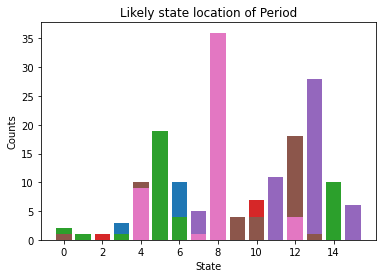

In [28]:
N = int(input("Which number do you wish to factorise"))
n = int(np.ceil(np.log2(N)))
m = 1

Algs = Algorithms(quantum_reg(n+m))
f = False
while f == False:
    if Algs.Shors(N, n, m) == (5, 3):
        print("(5, 3)")
        f = True
    elif Algs.Shors(N, n, m) == (3, 5):
        print("(3, 5)")
        f = True

## Visualisations

In [37]:
grover_amplification_4qbit(reg)
reg.tensor


array([0.83188464-0.01658543j, 0.23887061+0.01991431j,
       0.02856917-0.13292473j, 0.10143033-0.05799271j,
       0.07594223+0.12281723j, 0.13404684+0.04050314j,
       0.0604233 -0.07068664j, 0.09703495-0.07083665j,
       0.1767626 +0.04050314j, 0.17712474+0.00930292j,
       0.11340824-0.00818664j, 0.15992693-0.00636602j,
       0.05652013+0.06665341j, 0.04884563+0.06577911j,
       0.12768083-0.05920095j, 0.13207621-0.00818664j])

(0.0, 1.0)

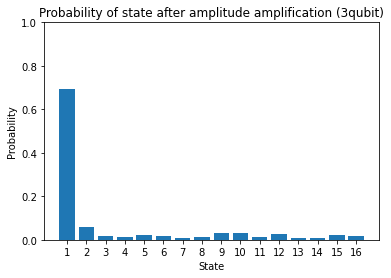

In [38]:
states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
plt.bar(states, np.abs(reg.tensor)**2)
plt.xlabel('State')
plt.title('Probability of state after amplitude amplification (3qubit)')
plt.xticks(np.arange(1, len(states) + 1, 1))
plt.ylabel('Probability')
plt.ylim(0, 1)

In [39]:
grover_oracle_4qbit(reg,['0000'])
reg.tensor

array([-0.83188464+0.01658543j,  0.23887061+0.01991431j,
        0.11419343-0.07379052j,  0.11272911+0.03071504j,
        0.11716159+0.08440649j,  0.13934302-0.01387748j,
        0.02877324-0.08842894j,  0.06254059-0.1025782j ,
        0.14780746+0.10506414j,  0.16008185+0.07637748j,
        0.10790844+0.03583598j,  0.15018939+0.05531995j,
        0.08709684+0.00716531j,  0.08105193+0.01197378j,
        0.12768083-0.05920095j,  0.13207621-0.00818664j])

In [40]:
grover_amplification_4qbit(reg)
reg.tensor

array([-0.90736749-3.30635233e-03j,  0.11326601+7.34209990e-03j,
        0.03171821+7.88960018e-02j,  0.03971613-1.57206310e-02j,
       -0.02061384-2.82243671e-01j, -0.00133015+2.36153386e-02j,
       -0.09491607-9.69344684e-02j, -0.04860444-1.16292469e-01j,
        0.01130418+8.85205005e-02j,  0.02086874+4.66054555e-02j,
       -0.02738787+2.30327487e-02j,  0.04725952+3.69902164e-02j,
       -0.06624465-2.81737745e-04j, -0.06707852+7.94240824e-03j,
       -0.0033752 +1.22658737e-01j, -0.00283449-1.81193586e-02j])

In [41]:
grover_oracle_4qbit(reg,['0000'])
reg.tensor

array([ 0.90736749+0.00330635j,  0.11326601+0.0073421j ,
       -0.03335974+0.07821606j,  0.03919971+0.01696738j,
       -0.12705468-0.25287058j,  0.0078083 +0.02232676j,
       -0.12478623-0.05323296j, -0.08940785-0.08884012j,
       -0.02343162+0.0861082j ,  0.00144507+0.05104395j,
       -0.03411734+0.0107986j ,  0.02950656+0.05225994j,
       -0.04704126+0.04664282j, -0.04181555+0.05304781j,
       -0.0033752 +0.12265874j, -0.00283449-0.01811936j])

In [42]:
grover_amplification_4qbit(reg)
reg.tensor

array([ 0.85484041-0.05895184j,  0.01864533-0.01880096j,
       -0.08338576-0.16174383j,  0.00833389-0.04209141j,
       -0.19424184+0.13253797j, -0.07026646+0.05364948j,
       -0.17461107-0.04686694j, -0.14022476-0.08074067j,
       -0.11509077+0.08047711j, -0.09363613+0.02083356j,
       -0.10785142+0.0237651j , -0.01693506+0.033533j  ,
       -0.15663986+0.02074066j, -0.13562093+0.02099051j,
       -0.08018747-0.08598667j, -0.0844973 -0.02900075j])

(0.0, 1.0)

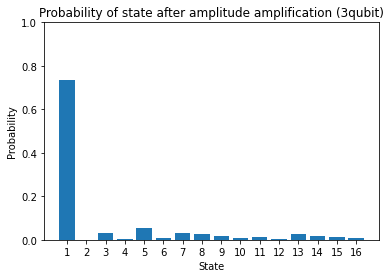

In [43]:

states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
plt.bar(states, np.abs(reg.tensor)**2)
plt.xlabel('State')
plt.title('Probability of state after amplitude amplification (3qubit)')
plt.xticks(np.arange(1, len(states) + 1, 1))
plt.ylabel('Probability')
plt.ylim(0, 1)

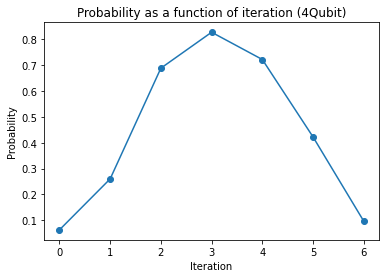

In [44]:
Probability = [0.25**2, 0.51**2, 0.83**2, 0.91**2, 0.85**2, 0.65**2, 0.31**2]
Iterations = [0, 1, 2, 3, 4, 5, 6]

plt.title('Probability as a function of iteration (4Qubit)')
plt.ylabel('Probability')
plt.xlabel('Iteration')
plt.plot(Iterations, Probability)
plt.scatter(Iterations, Probability)

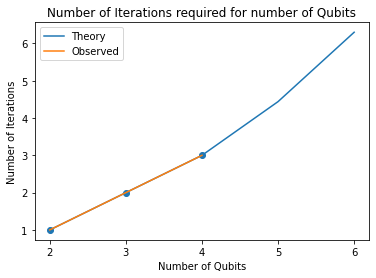

In [45]:
Qubits = [2, 3, 4]
Iterations = [1, 2, 3]

tQubits = [2, 3, 4, 5, 6]
tIterations = [1, 2, 3, 4.44, 6.3]

plt.plot(tQubits,tIterations, label = 'Theory')
plt.plot(Qubits, Iterations, label = 'Observed')
plt.title('Number of Iterations required for number of Qubits')
plt.ylabel('Number of Iterations')
plt.xlabel('Number of Qubits')
plt.xticks(np.arange(1, len(tQubits)+2, 1))
plt.yticks(np.arange(0, 8, 1))
plt.legend()
plt.scatter(Qubits, Iterations)

7
Y
7
Y
13
11
Y
8
Y
7
7
2
2
11
Y
7
8
Y
7
Y
8
Y
7
Y
4
2
7
4
Y
4
Y
8
Y
13
8
Y
2
2
4
Y
2
Y
7
2
4
Y
8
Y
7
2
11
11
8
Y
13
4
Y
4
7
Y
4
Y
4
Y
7
13
4
4
Y
7
Y
2
13
4
Y
13
7
7
8
Y
2
2
13
7
7
Y
13
11
7
Y
13
11
4
Y
4
Y
13
13
13
2
11
Y
4
13
4
Y
11
Y
7
Y
11
Y
2
2
13
7
Y
8
2
7
Y
11
Y
11
4
Y
11
Y
13
7
Y
7
Y
4
Y
8
Y
13
11
Y
13
11
Y
7
Y
13
7


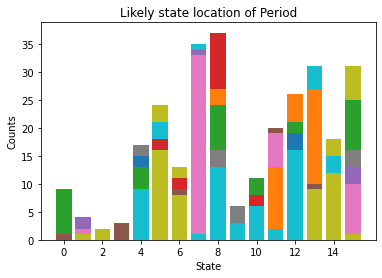

In [57]:
found = 0
for i in range(100):
    a = Shors(15)
    if a == (3, 5) or a == (5, 3):
        found += 1
        print("Y")
        

In [56]:
print(found/100)

0.52


7


(5, 3)

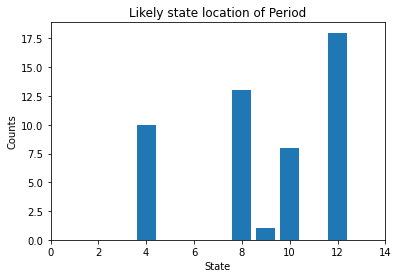

In [170]:
Shors(15)

8


(3, 5)

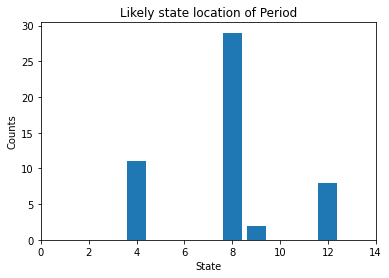

In [169]:
Shors(15)

13


'Failed to find factors'

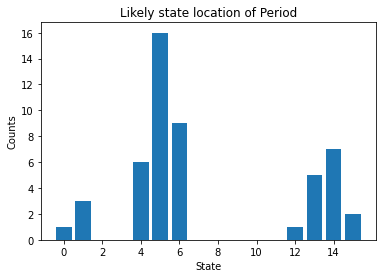

In [168]:
Shors(15)

(3, 7)

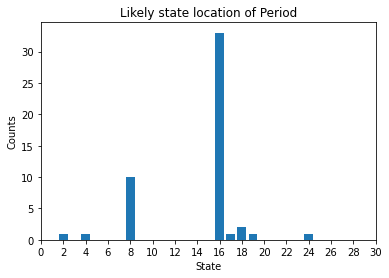

In [95]:
Shors(21)

(3, 7)

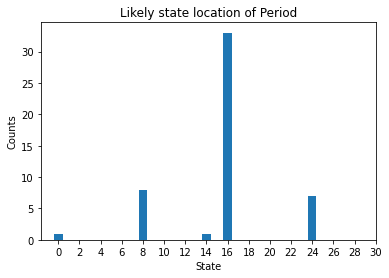

In [96]:
Shors(21)

'Failed to find factors'

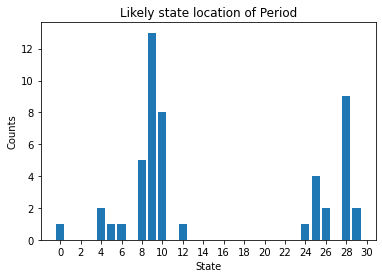

In [97]:
Shors(21)

'Failed to find factors'

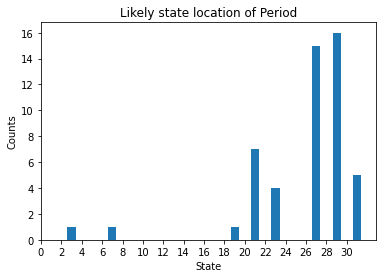

In [101]:
Shors(30)